# Exploring PyTorch Workflow

* Preapre Data
* Build Model
* Training Model
* Make Predictions
* Save and load model
* Putting all together

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)

# Check if CUDA is available
print(torch.cuda.is_available())

# Check if cuDNN is enabled 
print(torch.backends.cudnn.enabled)

2.3.1+cu121
True
True


# Collecting/Preparing Data

In [4]:
# Create *Known* Parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias

x[: 10], y[: 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Spliting data for train, validate, test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape    


(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

# Visualize the data

In [11]:
def plot(x, y,x_test,y_test, y_pred=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='y_true', color='green')
    plt.scatter(x_test, y_test, label='y_test', color='red')
    if y_pred is not None:
        plt.scatter(x, y_pred, label='y_pred', color='red')
    plt.legend()
    plt.show()



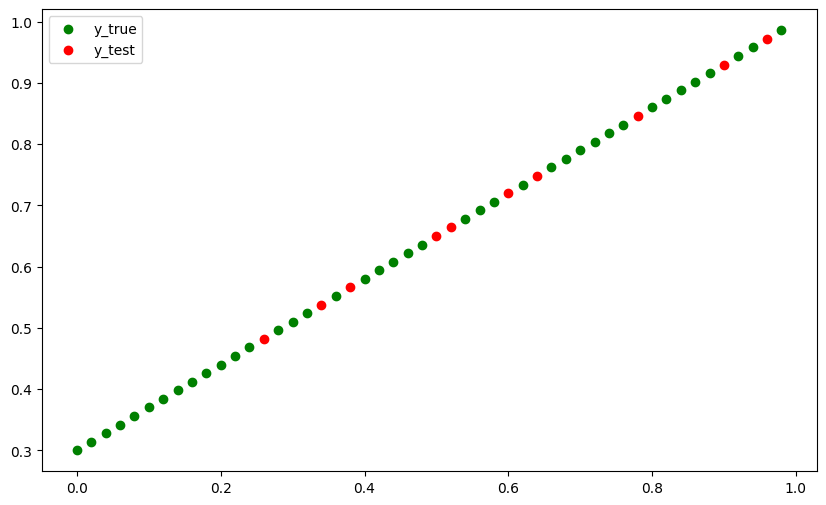

In [12]:
plot(x_train, y_train,x_test,y_test)

# Building Model


In [20]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### CHecking the content of our model

In [26]:
#creating a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegression()
print(model_0)
print(list(model_0.parameters()))
print(model_0.state_dict())

LinearRegression()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


# Checking the model Preditive power

In [31]:
with torch.inference_mode():
    y_pred = model_0(x_test)
    print(y_pred[:5])

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433]])


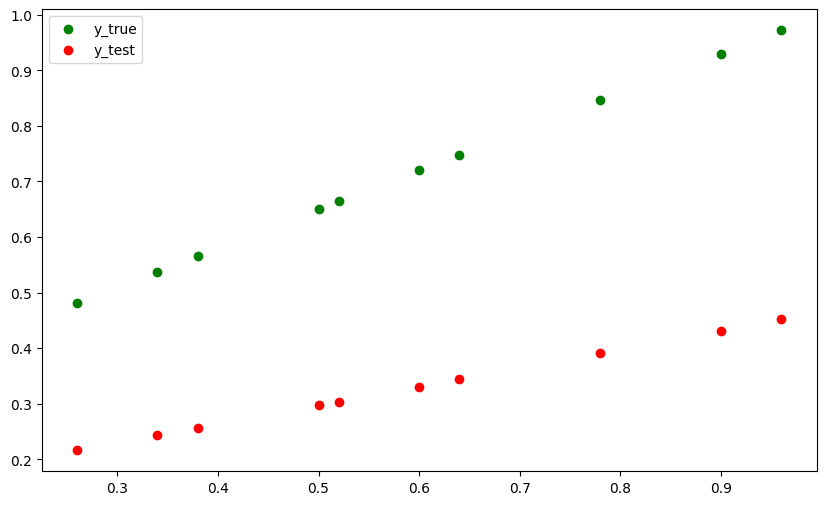

In [34]:
plot(x_test, y_test,x_test, y_pred)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433]])


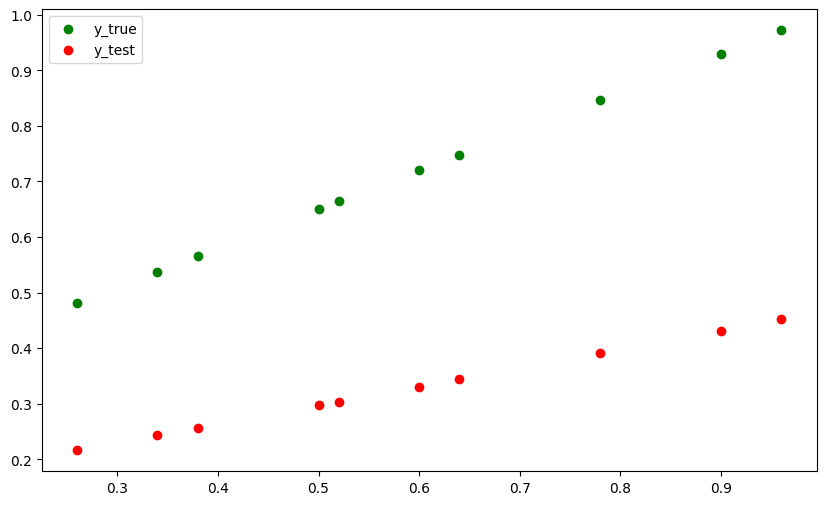

In [35]:
with torch.no_grad():
    y_pred = model_0(x_test)
    print(y_pred[:5])

plot(x_test, y_test,x_test, y_pred)

# Train the model
Model should be trained to get accurate results

### Setup loss function and Optimizer

In [38]:
# Loss Function
loss_fn = nn.MSELoss()

#Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### Building a training loop

In [39]:
# Epochs
epochs = 1

# Training Loop
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()
    # Forward Pass
    y_pred = model_0(x_train)

    # Compute Loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Optimizer Step
    optimizer.step()


    model_0.eval() #set the model to evaluation mode/ turn off the gradient tracking